In [1]:
# -*- coding: utf-8 -*-
from keras.models import Sequential
from keras import backend as K
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import RandomNormal
from keras.optimizers import Adam
from dataset.mnist import load_mnist

# feature selection
from feature_selection import FeatureSelection
from util import *

# other
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Using TensorFlow backend.
/Users/kohei_wakamatsu/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# load mnist with noise
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=False, one_hot_label=True)
x_train = add_noise_mnist(x_train, noise_range=256).transpose(0, 2, 3, 1)
x_test  = add_noise_mnist(x_test, noise_range=256).transpose(0, 2, 3, 1)

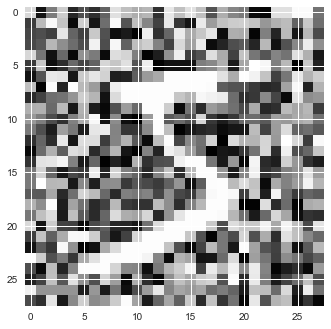

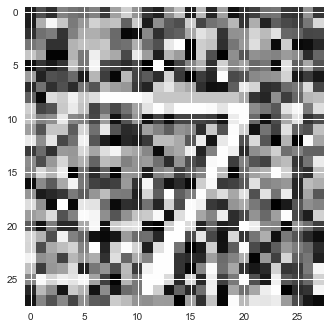

In [3]:
# check data
visualize_mnist(x_train[0])
visualize_mnist(x_test[0])

In [4]:
# define model 
def mnist_model():
    model = Sequential()
    
    model.add(FeatureSelection(activation='tanh', input_shape=(28, 28, 1)))

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
              
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
              
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    return model

In [5]:
# check model summary
model = mnist_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_selection_1 (Feature (None, 28, 28, 1)         784       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                401472    
__________

In [6]:
# learn
history = model.fit(x_train, t_train,
                    batch_size=256,
                    epochs=10,         
                    verbose=1,         # output log
                    validation_data=(x_test, t_test))
score   = model.evaluate(x_test, t_test, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 148s 2ms/step - loss: 1.1153 - acc: 0.6154 - val_loss: 0.3732 - val_acc: 0.8996
Epoch 2/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.5652 - acc: 0.8184 - val_loss: 0.2480 - val_acc: 0.9263
Epoch 3/10
60000/60000 [==============================] - 147s 2ms/step - loss: 0.4408 - acc: 0.8624 - val_loss: 0.1921 - val_acc: 0.9457
Epoch 4/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.3600 - acc: 0.8873 - val_loss: 0.1461 - val_acc: 0.9547
Epoch 5/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.3104 - acc: 0.9049 - val_loss: 0.1317 - val_acc: 0.9587
Epoch 6/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2745 - acc: 0.9148 - val_loss: 0.1261 - val_acc: 0.9628
Epoch 7/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2525 - acc: 0.9219 - val_loss: 0.1114 - 

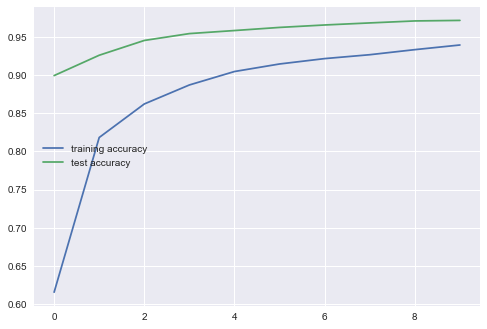

In [7]:
# learning curve
x = [ i for i in range(10)]
plt.plot(history.epoch, history.history['acc'], label='training accuracy')
plt.plot(history.epoch, history.history['val_acc'], label='test accuracy')
    
plt.legend(loc='center left')
plt.show()

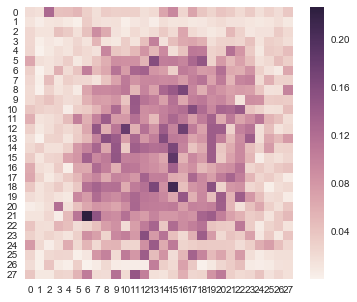

In [8]:
# weight heatmap
fs_weight = abs(model.get_weights()[0]).reshape(28, -1)
plt.figure(figsize=(6,5))
sns.heatmap(fs_weight)
plt.show()